<a href="https://colab.research.google.com/github/raviraja003/ML_Project/blob/master/Exploratory_Data_Analysis_of_Car_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title:-   EXPLORATORY DATA ANALYSIS OF CAR FEATURES

Exploratory Data Analysis or (EDA) :- It is understanding the data sets by summarizing their main characteristics often plotting them visually.Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more.

OBJECTIVE:- The objective of the project is to do data pre-processing and exploratory data analysis of the dataset.

# Step 1 :- Importing the Dataset and the necessary Libraries, Checking datatype.

In [7]:
# Importing the required libraries for EDA
import numpy as np
import pandas as pd
import tensorflow as tf         #VISUALISATION
import matplotlib.pyplot as plt #VISUALISATION
import seaborn as sns           #VISUALISATION

In [8]:
# Load dataset into colab
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [9]:
# Loading the data into the data frame
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [10]:
# To display the top 5 rows of Data
df.head(5)  

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
# To display the botton 5 rows
df.tail(5) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [12]:
# Checking the Datatypes of Data
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [13]:
# To Identify the type of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [14]:
# Checking the Shape of Data
df.shape

(11914, 16)

In [15]:
# Statistical summary of Data
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [16]:
# Checking for Null values in Data
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# Step 2 :- Removing Irrelevant Columns in Dataset.

In [17]:
# Dropping the columns of Data
df=df.drop(columns=["Market Category","Engine Fuel Type", "Number of Doors","Popularity","Model","Year"],axis=1)

 - These Features do not Contribute to the Prediction of the Price.
 - Market Category can be Removed Since it has many Null values.
 - The brand of car is Important and not the Model.

In [18]:
# Displaying the Data after Removing the columns
df.head()

,Make,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


# Step 3 :- Renaming the Columns.

In [19]:
# Renaming the Columns
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })

In [20]:
# Displaying the Data after Renaming the columns
df.head()

,Make,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Price
0,BMW,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


# Step 4 :- Dropping the Duplicate Rows, Null values and Missing Data.

In this case contains more than 10, 000 rows often have some duplicate data, so here we remove all the duplicate value from the data-set.

- DUPLICATE ROWS

In [21]:
# Number of Rows and Columns Before
df.shape

(11914, 10)

In [22]:
# Duplicate Rows are Present in the Dataset
duplicate_rows_df = df[df.duplicated()]
print("Number of Duplicate Rows: \n", duplicate_rows_df.shape)

Number of Duplicate Rows: 
 (1498, 10)


In [23]:
# Dropping Duplicated Rows
df = df.drop_duplicates()
# Number of Rows and Columns After
df.head(5)

,Make,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Price
0,BMW,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


In [24]:
# Checking the Shape of Data
df.shape

(10416, 10)

- NULL VALUES AND MISSING VALUES

In [25]:
# Null values are Present
print(df.isnull().sum())

Make              0
HP               61
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Price             0
dtype: int64


In [26]:
# Dropping the missing values
df = df.dropna() 
# Counting the Number of Rows After Removing the Data
df.count()

Make             10326
HP               10326
Cylinders        10326
Transmission     10326
Drive Mode       10326
Vehicle Size     10326
Vehicle Style    10326
MPG-H            10326
MPG-C            10326
Price            10326
dtype: int64

In [27]:
# Checking Wheather all Null Values Removed or Not
print(df.isnull().sum())

Make             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [28]:
# Checking the Shape of Data
df.shape

(10326, 10)

# Step 5 :- Detecting Outliers.

An outlier is a point or set of points that are different from other points. they can be very high or very low. It's often a good idea to detect and remove the outliers

- DETECTION OF OUTLIERS

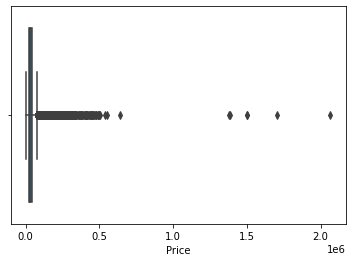

In [29]:
sns.boxplot(x=df['Price'])

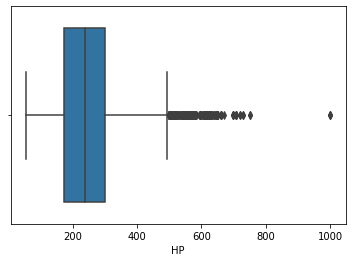

In [30]:
sns.boxplot(x=df['HP'])

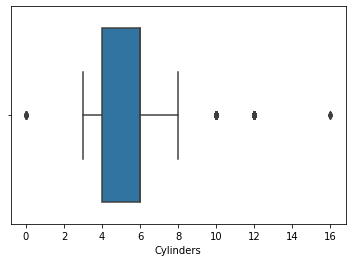

In [31]:
sns.boxplot(x=df['Cylinders'])

- REMOVAL OF OUTLIERS

In [32]:
# Using Interquartile  Range Method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

HP             129.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        20975.0
dtype: float64


In [33]:
# To Remove the Outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# Checking the Shape of Data
df.shape

(9171, 10)

# Step 6 :- Most Represented Car Brands.

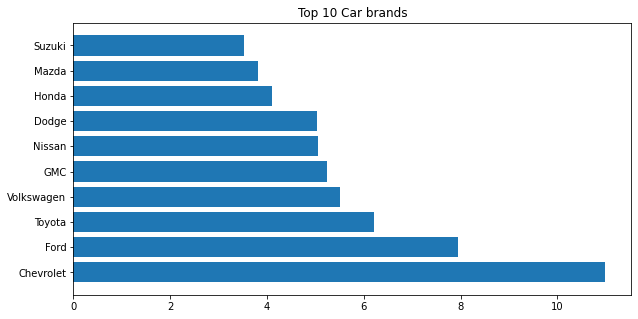

In [34]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plotting the graph
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [35]:
# To find the Average Price of the Cars
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print("The Average Price of Top Branded Cars are : \n",prices)

The Average Price of Top Branded Cars are : 
                    Price
Make                    
Chevrolet   28238.587885
Dodge       22640.588745
Ford        27843.995879
GMC         32570.935417
Honda       27178.853723
Mazda       19901.719198
Nissan      26909.535637
Toyota      27522.103691
Volkswagen  28372.645545


# Step 7 :- Correlation Matrix.

In [36]:
# Correlation matrix for Different Columns
df.corr()

,HP,Cylinders,MPG-H,MPG-C,Price
HP,1.000000,0.697729,-0.423702,-0.519429,0.741033
Cylinders,0.697729,1.000000,-0.703366,-0.751810,0.321756
MPG-H,-0.423702,-0.703366,1.000000,0.940995,-0.059940
MPG-C,-0.519429,-0.751810,0.940995,1.000000,-0.131613
Price,0.741033,0.321756,-0.059940,-0.131613,1.000000


- From The Plot
    - High Correlation: One Quantity Increase and Other is also Increase.
         - Cylinders & HP
         - Highway MPG-H & City MPG-C
    - Low Correlation: One Quantity Increase and Other is Decrease.
        - Correlation & MPG-H
        - Correlation & MPG-C     

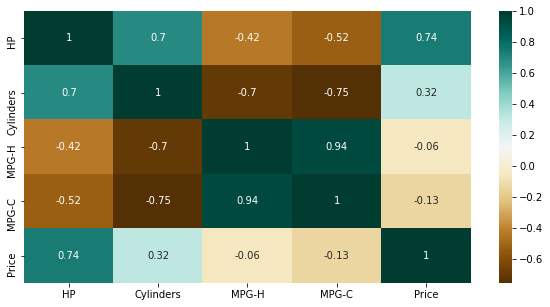

In [37]:
# Plotting the Matrix
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

# Step 8 :- Perform EDA and Plot Graphs

- HISTOGRAMS REFERS TO THE FREQUENCY OF OCCURRENCE OF VARIABLES IN AN INETRVAL.

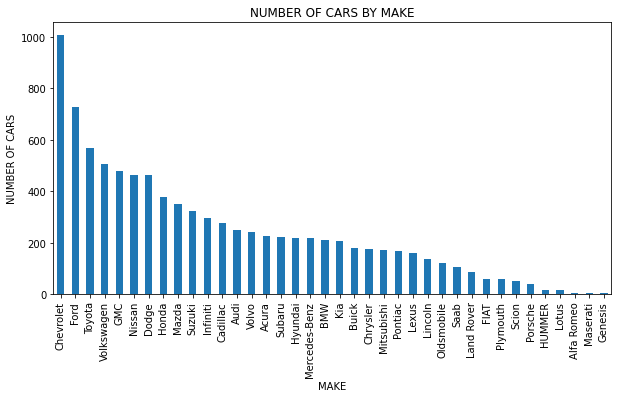

In [38]:
# Plotting Histogram
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("NUMBER OF CARS BY MAKE")
plt.ylabel('NUMBER OF CARS')
plt.xlabel('MAKE');

- WE CAN SEE THAT CHEVROLET MADE THE MOST SELLINGS COMPARED TO OTHER COMPANIES CARS

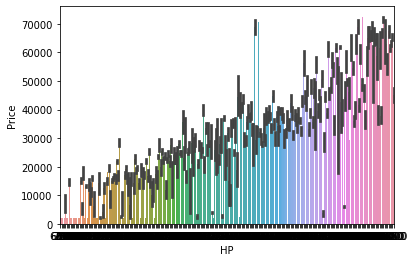

In [40]:
# Plotting Bar Graph
sns.barplot(df['HP'],df['Price'])

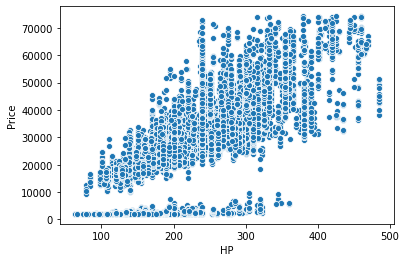

In [41]:
# Plotting Scatter Graph
sns.scatterplot(df['HP'],df['Price'])

- WE CAN SEE THAT AS HP INCREASES PRICE INCREASES

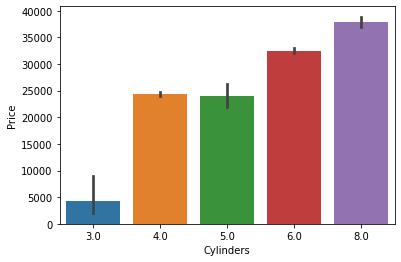

In [42]:
# Plotting Bar Graph
sns.barplot(df['Cylinders'],df['Price'])

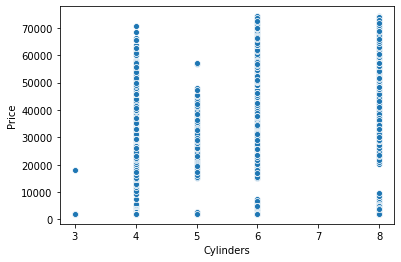

In [43]:
# Plotting Scatter Graph
sns.scatterplot(df['Cylinders'],df['Price'])

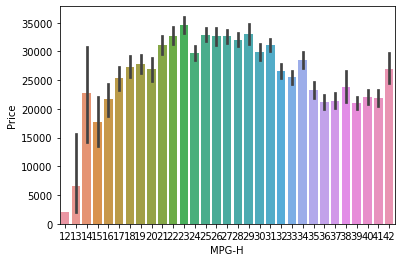

In [44]:
# Plotting Bar Graph
sns.barplot(df['MPG-H'],df['Price'])

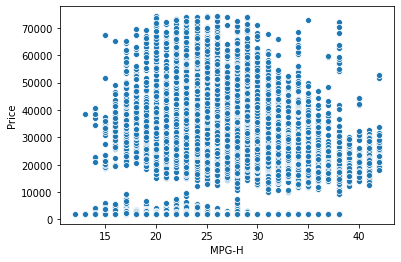

In [45]:
# Plotting Scatter Graph
sns.scatterplot(df['MPG-H'],df['Price'])

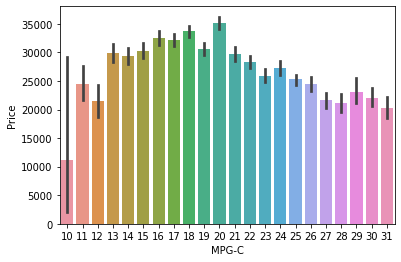

In [46]:
# Plotting Bar Graph
sns.barplot(df['MPG-C'],df['Price'])

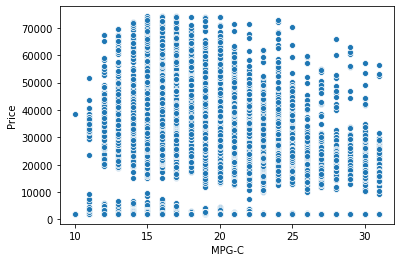

In [47]:
# Plotting Scatter Graph
sns.scatterplot(df['MPG-C'],df['Price'])

- FROM MPG-H&G WITH PRICE, WE GET TO KNOW THAT AS MPG INCREASES PRICE INCREASES AND LATER IT DECREASES.
- SINCE MPG AND NUMBER OF CYLINDERS ARE VERY LOW CORRELATED, INCREASING IN CYLINDERS DECREASES MPG AND THE PRICE GETS DECREASED

* LABEL ENCODING REFERS TO CONVERTING THE LABELS INTO NUMERIC FORM SO AS TO CONVERT IT INTO THE MACHINE READABLE FORM.
* MACHINE LEARNING ALGORITHMS CAN THEN DECIDE IN A BETTER WAY ON HOW THOSE LABELS MUST BE OPERATED.

* **ENCODING THE DATA**

In [49]:
from sklearn.preprocessing import LabelEncoder
#Creating the object instance
enc=LabelEncoder()
d=df.select_dtypes(exclude=[np.number]).columns
for i in d:
  df[i]=enc.fit_transform(df[i])
print('THE LABEL ENCODED DATA IS:\n')
df.head()  

THE LABEL ENCODED DATA IS:



,Make,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Price
0,3,335.0,6.0,2,3,0,8,26,19,46135
1,3,300.0,6.0,2,3,0,6,28,19,40650
2,3,300.0,6.0,2,3,0,8,28,20,36350
3,3,230.0,6.0,2,3,0,8,28,18,29450
4,3,230.0,6.0,2,3,0,6,28,18,34500


* **SPLITTING THE DATA**

SPLITTING THE DATA IN THE RATIO 80:20 WHERE;
  * 80% --> TRAINING SET
  * 20% --> TESTING SET

* USING RANDOM FOREST REGRESSOR

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

y=df.iloc[:,8]     
X=df.iloc[:,0:8]    #PRICE IS THE TARGET VARIABLE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [51]:
#ACCURACY OF THE MODEL
print("THE MODEL SCORE OF THE MODEL IS :\n",model.score(X_test,y_test))

THE MODEL SCORE OF THE MODEL IS :
 0.9867151998797598


THE MODEL SCORE OF THE MODEL USING RANDOM FOREST REGRESSION IS FOUND TO BE 0.9867 WHICH IS CLOSE TO 1

ONE MORE ADVANTAGE OF USING RANDOM FOREST IS THAT IT GIVES BETTER RESULT THAN OTHER ALGORITHMS.

* USING LOGISTIC REGRESSION

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [53]:
y=df.iloc[:,8]
x=df.iloc[:,0:8]
x_train,x_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [54]:
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,Y_train)
Y_pred=logistic_regression.predict(x_test)
print("THE MODEL SCORE OF THE MODEL IS :\n",logistic_regression.score(x_test,Y_test))

THE MODEL SCORE OF THE MODEL IS :
 0.2103542234332425


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


* USING LINEAR REGRESSION

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [57]:
yy=df.iloc[:,8]
xx=df.iloc[:,0:8]
xx_train,xx_test,yy_train,yy_test=train_test_split(xx,yy,test_size=0.2,random_state=0)

In [58]:
linear_regression=LinearRegression()
linear_regression.fit(xx_train,yy_train)
yy_pred=linear_regression.predict(xx_test)
print("THE MODEL SCORE OF THE MODEL IS :\n",linear_regression.score(xx_test,yy_test))

THE MODEL SCORE OF THE MODEL IS :
 0.9217010532718792


* USING KNEIGHBOR CLASSIFIER

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [60]:
yyy=df.iloc[:,8]
xxx=df.iloc[:,0:8]
xxx_train,xxx_test,yyy_train,yyy_test=train_test_split(xxx,yyy,test_size=0.2,random_state=0)

In [61]:
classifier_knn=KNeighborsClassifier(n_neighbors=3)   
classifier_knn.fit(xxx_train,yyy_train)
yyy_pred=classifier_knn.predict(xxx_test)
print("THE MODEL SCORE OF THE MODEL IS :\n",classifier_knn.score(xxx_test,yyy_test))

THE MODEL SCORE OF THE MODEL IS :
 0.7787465940054495


* HENCE WE CAN SEE THAT RANDOM FOREST IS BETTER THAN OTHER ALGORITHMS FOR THIS PROJECT

RANDOM FOREST REGRESSION IS BETTER BECAUSE;
* IT HANDLES HIGH_DIMENSIONALITY VERY WELL SINCE IT TAKES SUBSETS OF DATA.
* IT IS EXTREMELY VERSATILE AND REQUIRES VERY LITTLE PREPROCESSING.
* IT IS GREAT AT AVOIDING OVERFITTING SINCE EACH DECISION TRESS HAS LOW BIAS.

# Step 9 :- Splitting and Generating the Score of the Model

- LABEL ENCODING REFERS TO CONVERTING THE LABELS INTO NUMERIC FORM SO AS TO CONVERT IT INTO THE MACHINE READABLE FORM.
- MACHINE LEARNING ALGORITHMS CAN THEN DECIDE IN A BETTER WAY ON HOW THOSE LABELS MUST BE OPERATED.

- ENCODING THE DATA

In [63]:
from sklearn.preprocessing import LabelEncoder
#Creating the object instance
enc=LabelEncoder()
d=df.select_dtypes(exclude=[np.number]).columns
for i in d:
  df[i]=enc.fit_transform(df[i])
print('THE LABEL ENCODED DATA IS:\n')
df.head()  

THE LABEL ENCODED DATA IS:



,Make,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Price
0,3,335.0,6.0,2,3,0,8,26,19,46135
1,3,300.0,6.0,2,3,0,6,28,19,40650
2,3,300.0,6.0,2,3,0,8,28,20,36350
3,3,230.0,6.0,2,3,0,8,28,18,29450
4,3,230.0,6.0,2,3,0,6,28,18,34500


- SPLITTING THE DATA

- SPLITTING THE DATA IN THE RATIO 80:20 WHERE;

  - 80% --> TRAINING SET
  - 20% --> TESTING SET

- USING RANDOM FOREST REGRESSOR

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

y=df.iloc[:,8]     
X=df.iloc[:,0:8]    #PRICE IS THE TARGET VARIABLE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [65]:
#ACCURACY OF THE MODEL
print("THE MODEL SCORE OF THE MODEL IS :\n",model.score(X_test,y_test))

THE MODEL SCORE OF THE MODEL IS :
 0.9867151998797598


THE MODEL SCORE OF THE MODEL USING RANDOM FOREST REGRESSION IS FOUND TO BE 0.9867 WHICH IS CLOSE TO 1

ONE MORE ADVANTAGE OF USING RANDOM FOREST IS THAT IT GIVES BETTER RESULT THAN OTHER ALGORITHMS.

- USING LOGISTIC REGRESSION

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [67]:
y=df.iloc[:,8]
x=df.iloc[:,0:8]
x_train,x_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,Y_train)
Y_pred=logistic_regression.predict(x_test)
print("THE MODEL SCORE OF THE MODEL IS :\n",logistic_regression.score(x_test,Y_test))

THE MODEL SCORE OF THE MODEL IS :
 0.2103542234332425


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


- USING LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [69]:
yy=df.iloc[:,8]
xx=df.iloc[:,0:8]
xx_train,xx_test,yy_train,yy_test=train_test_split(xx,yy,test_size=0.2,random_state=0)

In [70]:
linear_regression=LinearRegression()
linear_regression.fit(xx_train,yy_train)
yy_pred=linear_regression.predict(xx_test)
print("THE MODEL SCORE OF THE MODEL IS :\n",linear_regression.score(xx_test,yy_test))

THE MODEL SCORE OF THE MODEL IS :
 0.9217010532718792


- USING KNEIGHBOR CLASSIFIER

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [72]:
yyy=df.iloc[:,8]
xxx=df.iloc[:,0:8]
xxx_train,xxx_test,yyy_train,yyy_test=train_test_split(xxx,yyy,test_size=0.2,random_state=0)

In [73]:
classifier_knn=KNeighborsClassifier(n_neighbors=3)   
classifier_knn.fit(xxx_train,yyy_train)
yyy_pred=classifier_knn.predict(xxx_test)
print("THE MODEL SCORE OF THE MODEL IS :\n",classifier_knn.score(xxx_test,yyy_test))

THE MODEL SCORE OF THE MODEL IS :
 0.7787465940054495


- HENCE WE CAN SEE THAT RANDOM FOREST IS BETTER THAN OTHER ALGORITHMS FOR THIS PROJECT

RANDOM FOREST REGRESSION IS BETTER BECAUSE;

- IT HANDLES HIGH_DIMENSIONALITY VERY WELL SINCE IT TAKES SUBSETS OF DATA.
- IT IS EXTREMELY VERSATILE AND REQUIRES VERY LITTLE PREPROCESSING.
- IT IS GREAT AT AVOIDING OVERFITTING SINCE EACH DECISION TRESS HAS LOW BIAS.

# Step 10 :- Performance Check

- MEAN OF THE MODEL

In [74]:
print("THE MEAN PRICE OF THE MODEL IS:\n",round(df['Price'].mean(),2))

THE MEAN PRICE OF THE MODEL IS:
 29656.22


- THE MEAN SQUARED ERROR (MSE) MEASURES THE AVERAGE OF THE SQUARES OF ERRORS - THAT IS, THE AVERAGE SQUARED DIFFERENCE BETWEEN THE ESTIMATED VALUES AND THE ACTUAL VALUES.

- ROOT MEAN SQUARED ERROR CORRESPONDS TO THE AVERAGE DIFFERENCE BETWEEN THE OBSERVED KNOWN VALUES OF THE OUTCOME AND THE PREDICTED VALUES BY THE MODEL.
- LOWER THE VALUE, BETTER THE MODEL

- R-SQUARED EVALUATES THE SCATTER OF THE DATA POINTS AROUND THE FITTED REGRESSION.
- ASLO CALLED COEFFICIENT OF DETERMINATION/MULTIPLE DETERMINATION.
- HIGHER THE VALUE REPRESENTS SMALLER DIFFERENCES BETWEEN THE OBSERVED DATA ABD THE FITTED VALUES.

In [75]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

- USING RANDOM FOREST REGRESSION

In [76]:
print("THE MEAN SQUARED ERROR IS :\n",metrics.mean_absolute_error(y_test, pred))
print("ROOT MEAN SQUARE ERROR IS :\n",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print("R-SQUARED SCORE IS :\n",metrics.r2_score(y_test,pred))

THE MEAN SQUARED ERROR IS :
 0.23515058137846623
ROOT MEAN SQUARE ERROR IS :
 0.5175115362543838
R-SQUARED SCORE IS :
 0.9867151998797598


- USING LINEAR REGRESSION

In [77]:
print("THE MEAN SQUARED ERROR IS :\n",metrics.mean_absolute_error(yy_test,yy_pred))
print("ROOT MEAN SQUARE ERROR IS :\n",np.sqrt(metrics.mean_squared_error(yy_test,yy_pred)))
print("R-SQUARED SCORE IS :\n",metrics.r2_score(yy_test,yy_pred))

THE MEAN SQUARED ERROR IS :
 0.9070058285811458
ROOT MEAN SQUARE ERROR IS :
 1.2525141681776024
R-SQUARED SCORE IS :
 0.9217010532718791


- USING LOGISTIC REGRESSION

In [78]:
print("THE MEAN SQUARED ERROR IS :\n",metrics.mean_absolute_error(Y_test,Y_pred))
print("ROOT MEAN SQUARE ERROR IS :\n",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print("R-SQUARED SCORE IS :\n",metrics.r2_score(Y_test,Y_pred))

THE MEAN SQUARED ERROR IS :
 1.9122615803814713
ROOT MEAN SQUARE ERROR IS :
 2.6075764688445733
R-SQUARED SCORE IS :
 0.6606368111542226


- USING KNEIGHBOR CLASSIFIER

In [79]:
print("THE MEAN SQUARED ERROR IS :\n",metrics.mean_absolute_error(yyy_test,yyy_pred))
print("ROOT MEAN SQUARE ERROR IS :\n",np.sqrt(metrics.mean_squared_error(yyy_test,yyy_pred)))
print("R-SQUARED SCORE IS :\n",metrics.r2_score(yyy_test,yyy_pred))

THE MEAN SQUARED ERROR IS :
 0.35858310626703
ROOT MEAN SQUARE ERROR IS :
 0.9413307294645875
R-SQUARED SCORE IS :
 0.9557742610352461


RANDOMFOREST GIVES A BETTER PERFORMANCE OVER METRICS COMPARED TO OTHER ALGORITHMS